# Porter
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("seaborn-v0_8-notebook")
%matplotlib inline

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Data Dictionary](#data)
2. [Univariate Analysis](#univariate)
3. [Bivariate Analysis](#bivariate)
4. [Multivariate Analysis](#multivariate)
5. [Data Preprocessing and Feature Engineering](#feature_eng)
6. [Change cell background colors](#background)

# 1. Data Dictionary <a class='anchor' id='data'></a> [↑](#top)


Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

* market_id : integer id for the market where the restaurant lies
* actual_delivery_time : the timestamp when the order was delivered
* created_at : the timestamp at which the order was placed
* store_primary_category : category for the restaurant
* order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* total_items subtotal : final price of the order
* num_distinct_items : the number of distinct items in the order
* min_item_price : price of the cheapest item in the order
* max_item_price : price of the costliest item in order
* total_onshift_partners : number of delivery partners on duty at the time order was placed
* total_busy_partners : number of delivery partners attending to other tasks
* total_outstanding_orders : total number of orders to be fulfilled at the moment

In [71]:
porter = pd.read_csv("data/porter.csv", parse_dates=['created_at', 'actual_delivery_time'])
porter.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [72]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [73]:
porter.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,197428,197421,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,1.524867,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


In [74]:
porter.describe(include='object')

,store_id,store_primary_category
count,197428,192668
unique,6743,74
top,d43ab110ab2489d6b9b2caa394bf920f,american
freq,937,19399


In [75]:
porter[porter.columns[porter.isnull().any()]].isnull().sum()

market_id                     987
actual_delivery_time            7
store_primary_category       4760
order_protocol                995
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [76]:
porter.dropna().shape

(176248, 14)

In [77]:
porter.nunique(dropna=True)

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

In [78]:
porter.dropna(inplace=True)

In [79]:
porter.shape

(176248, 14)

# 2. Univariate Analysis <a class='anchor' id='univariate' ></a> [↑](#top)

In [80]:
df = porter.copy()

In [81]:
timestamp_cols = df.select_dtypes(include='datetime').columns
cat_cols = ['store_primary_category', 'order_protocol', 'total_items', 'num_distinct_items']
num_cols = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
obj_cols = df.select_dtypes(include='object').columns

In [82]:
df = (porter
          .assign(
              est_delivery_time =(porter.actual_delivery_time - porter.created_at).astype('int64')/ (10**9),
              created_at_day=porter.created_at.dt.day,
              created_at_weekday=porter.created_at.dt.weekday,
              created_at_hour = porter.created_at.dt.hour,
              )
)

In [83]:
# functions to annotate bars in bar chart

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for
             p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - .1
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), fontsize=10, color='black')

# example : with_hue(ax,g1.Content_Type,2,2)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

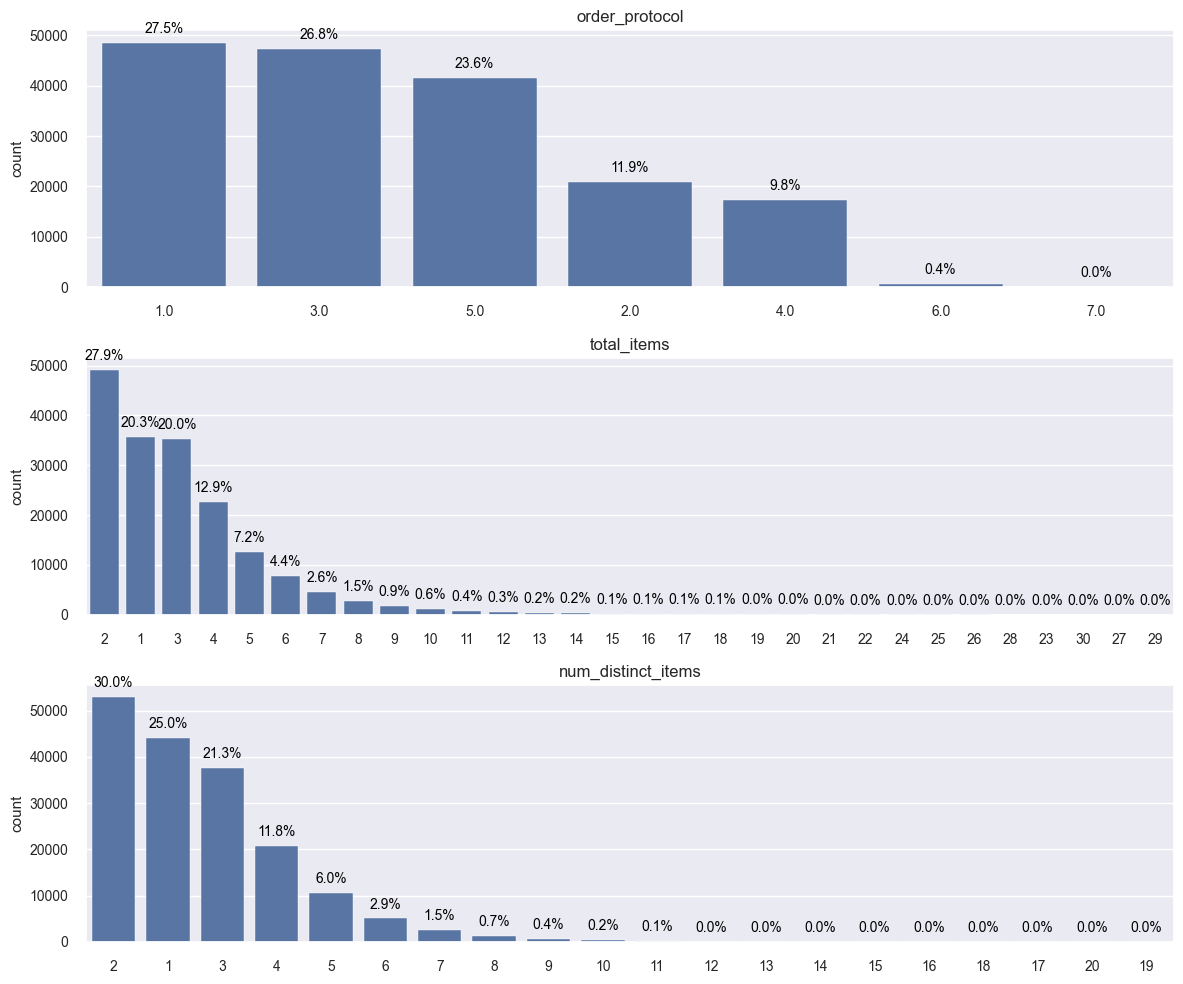

In [84]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, order = df[column].value_counts().head(30).index)
    ax.set_title(column)
    ax.set_xlabel('')
    without_hue(ax, df[column])
plt.tight_layout()
plt.show()

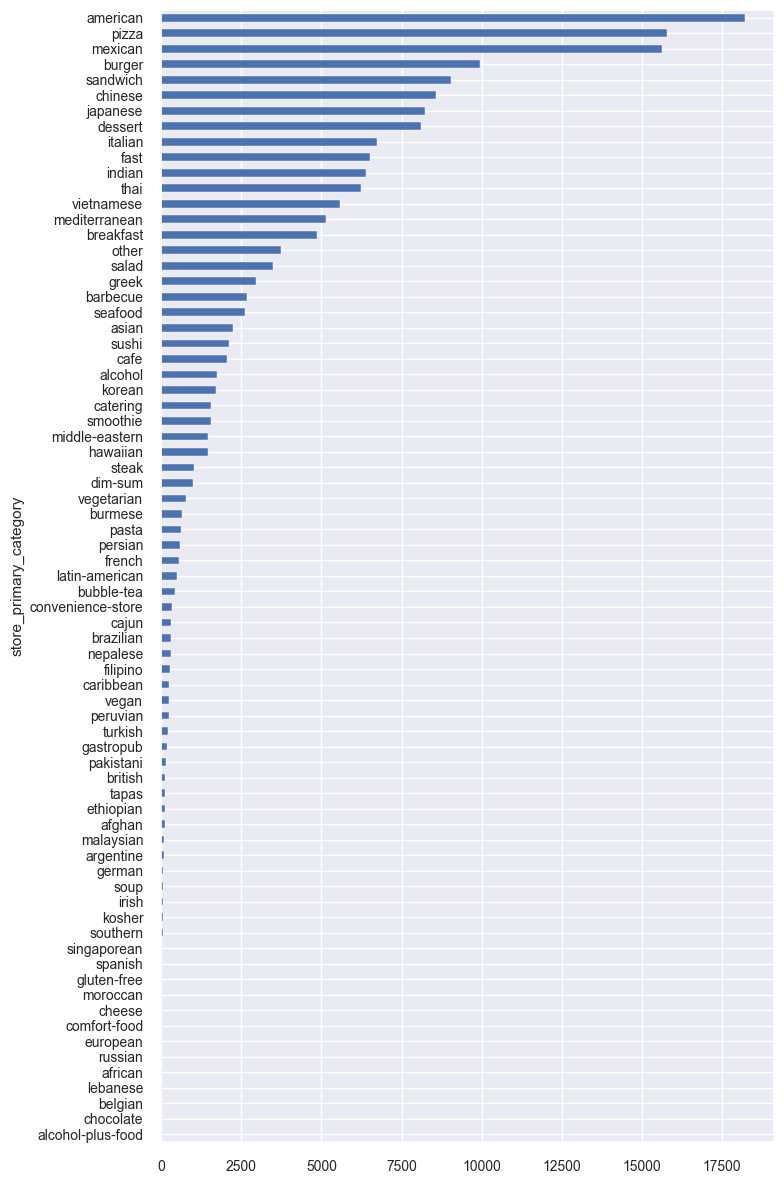

In [85]:
plt.figure(figsize=(8,12))
ax = df.store_primary_category.value_counts().plot(kind='barh')
ax.invert_yaxis()  # Invert the y-axis
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
# plt.subplots_adjust(bottom=0.6)  # Adjust the bottom margin to make room for rotated labels
plt.tight_layout()
plt.show()

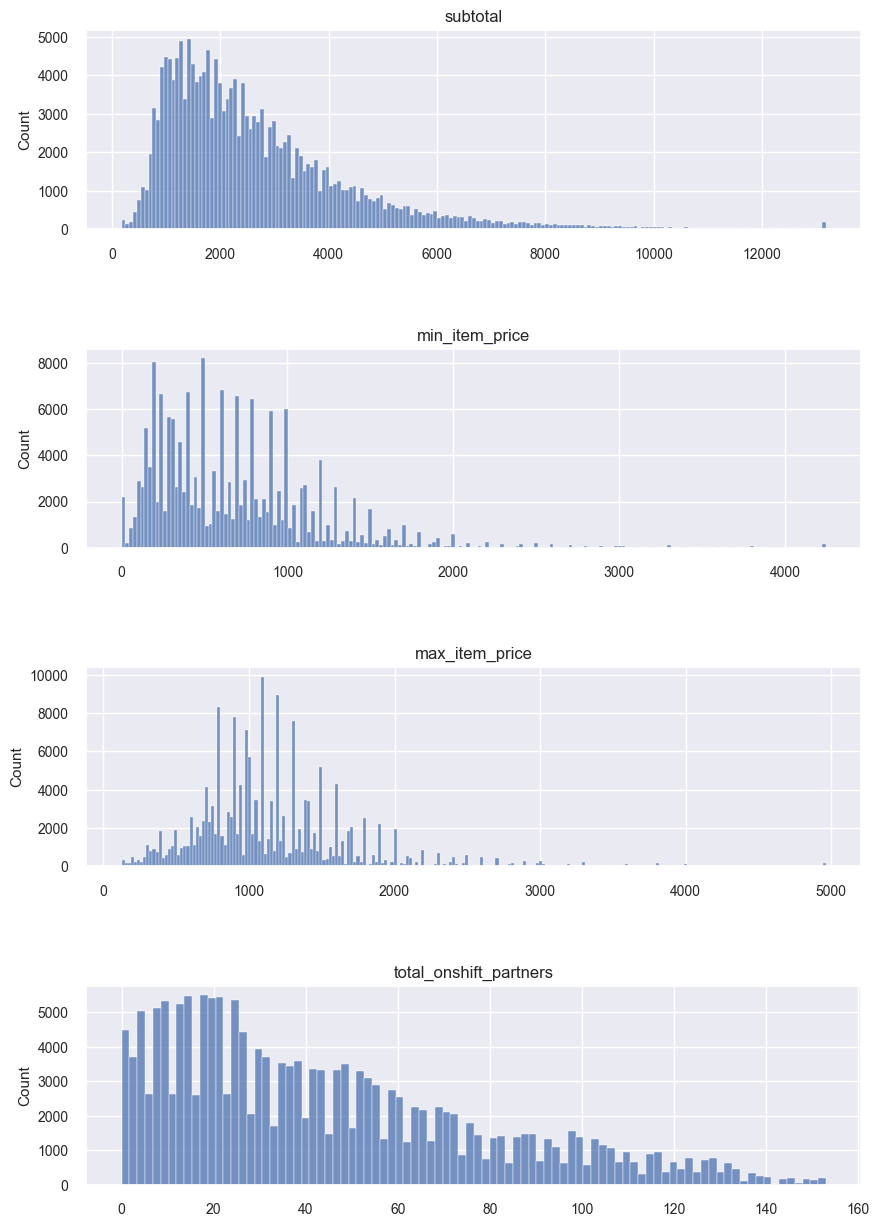

In [86]:
from scipy.stats.mstats import winsorize

fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,15))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.histplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, ax=ax)
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

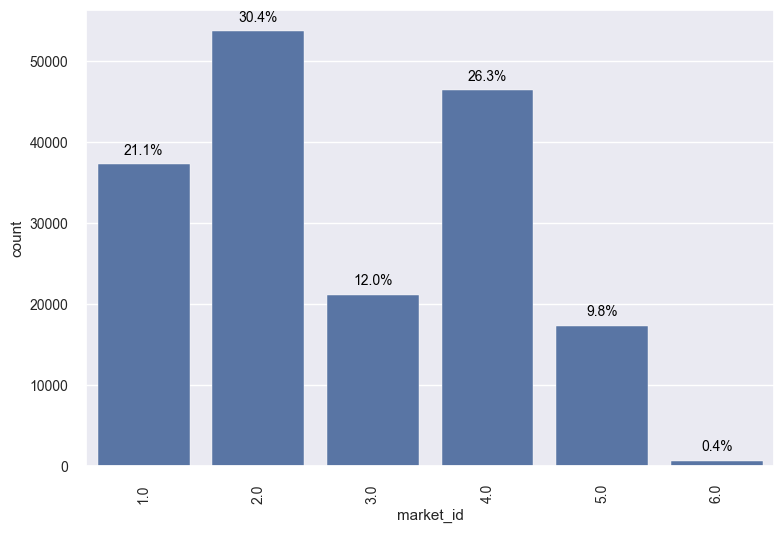

In [87]:
ax = sns.countplot(data=df,x="market_id")
plt.xticks(rotation='vertical')
without_hue(ax,df.market_id)
plt.tight_layout()

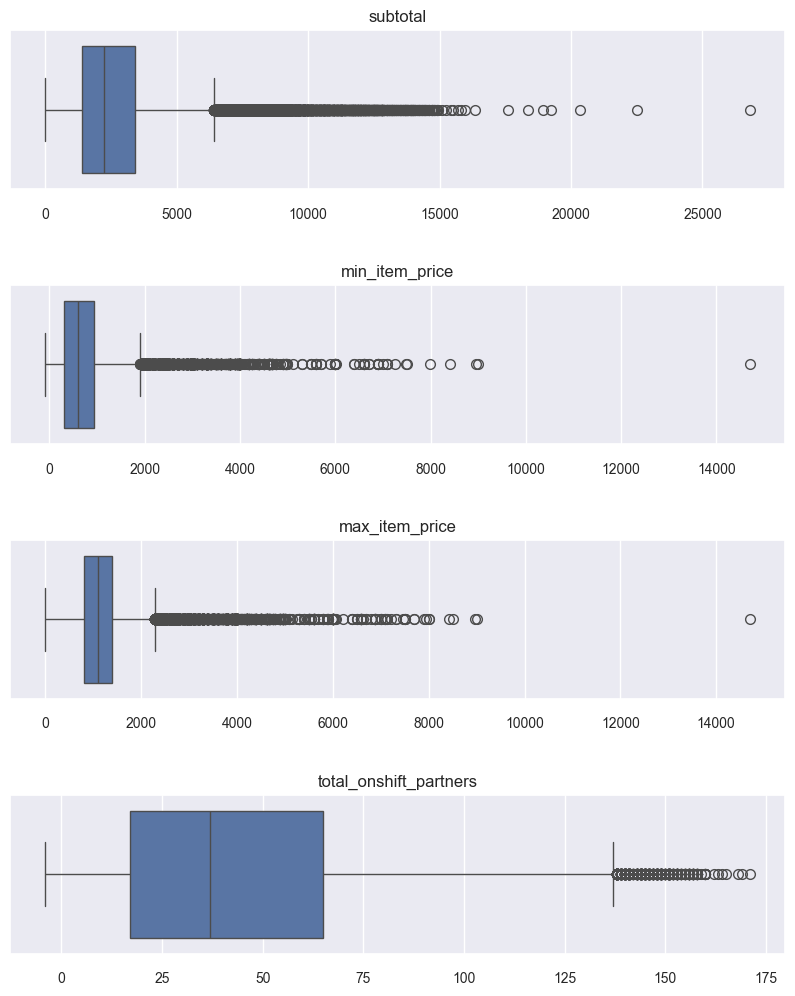

In [88]:
from scipy.stats.mstats import winsorize

fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,12))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

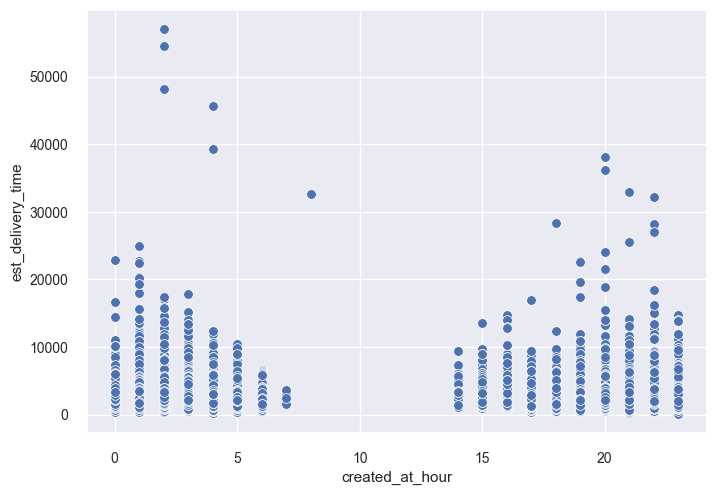

In [89]:
sns.scatterplot(data=df.query("est_delivery_time < 60000"), x="created_at_hour", y="est_delivery_time")
plt.show()

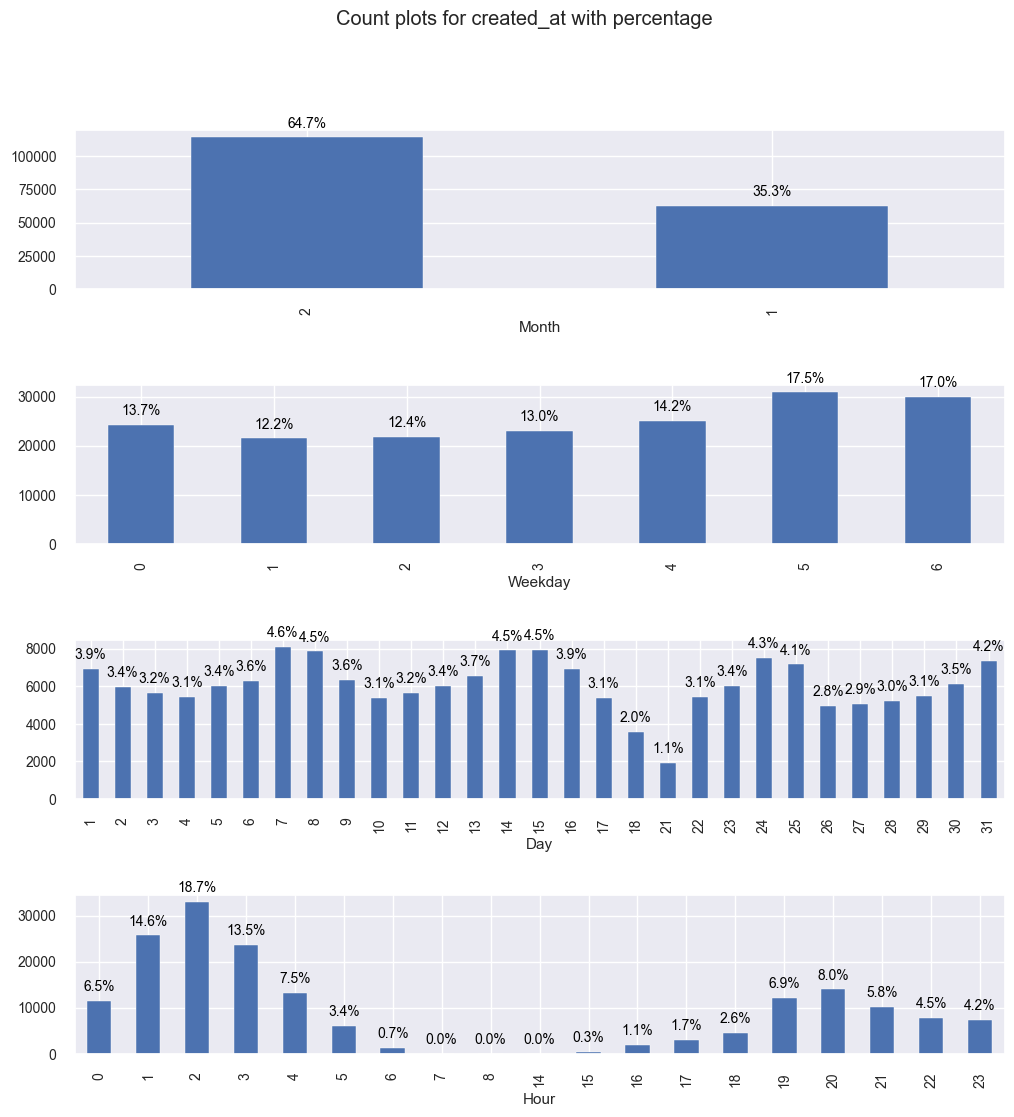

In [90]:
fig, axs = plt.subplots(4,1, figsize=(12,12))
plt.subplots_adjust(hspace=0.6)

plt.suptitle('Count plots for created_at with percentage')
axs = axs.ravel()
i = 0
for column in ['created_at']:
    ax=df[column].dropna().dt.month.value_counts().plot(kind='bar', ax=axs[i])
    ax.set_xlabel('Month')
    without_hue(ax, df[column])
    ax=df[column].dropna().dt.weekday.value_counts().sort_index().plot(kind='bar', ax=axs[i+1])
    ax.set_xlabel('Weekday')
    without_hue(ax, df[column])
    ax = df[column].dropna().dt.day.value_counts().sort_index().plot(kind='bar', ax = axs[i+2])
    ax.set_xlabel('Day')
    without_hue(ax, df[column])
    ax = df[column].dropna().dt.hour.value_counts().sort_index().plot(kind='bar', ax = axs[i+3])
    ax.set_xlabel('Hour')
    without_hue(ax, df[column])
    i = 1


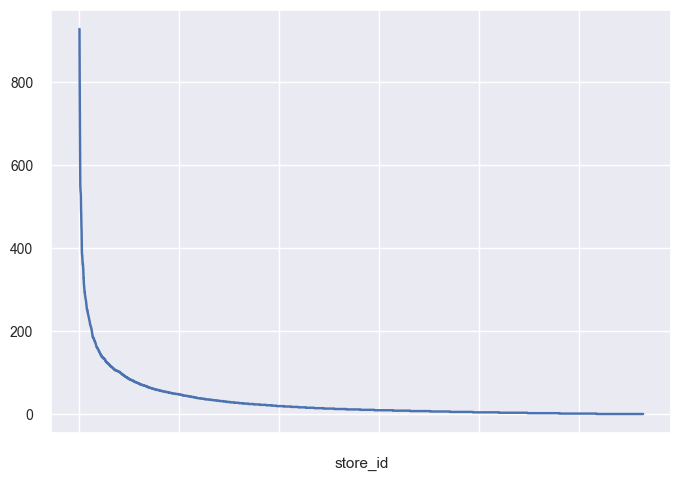

In [91]:
ax = df.store_id.value_counts().plot()
ax.set_xticklabels('')
plt.show()

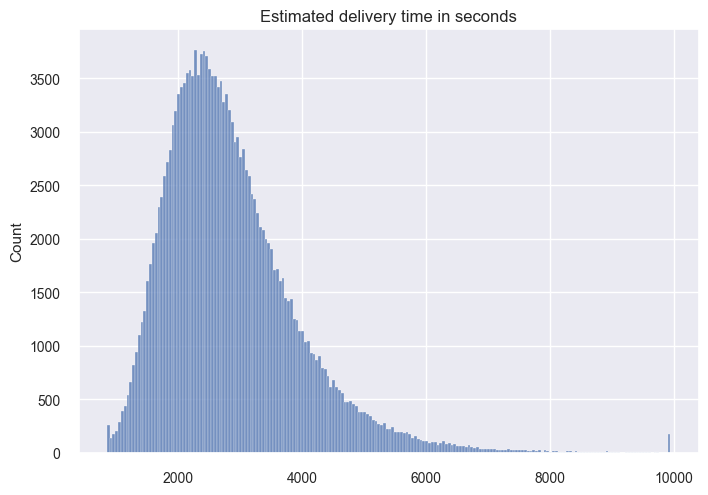

In [92]:
temp = df.dropna()
est_delivery_time = (
        (temp.actual_delivery_time - temp.created_at)
        .astype('int64')/ (10**9)
    )

sns.histplot(winsorize(est_delivery_time, limits=[0.001, 0.001]).data)
plt.title('Estimated delivery time in seconds')
plt.show()

# 3. Bivariate Analysis <a class='anchor' id='bivariate'></a> [↑](#top)

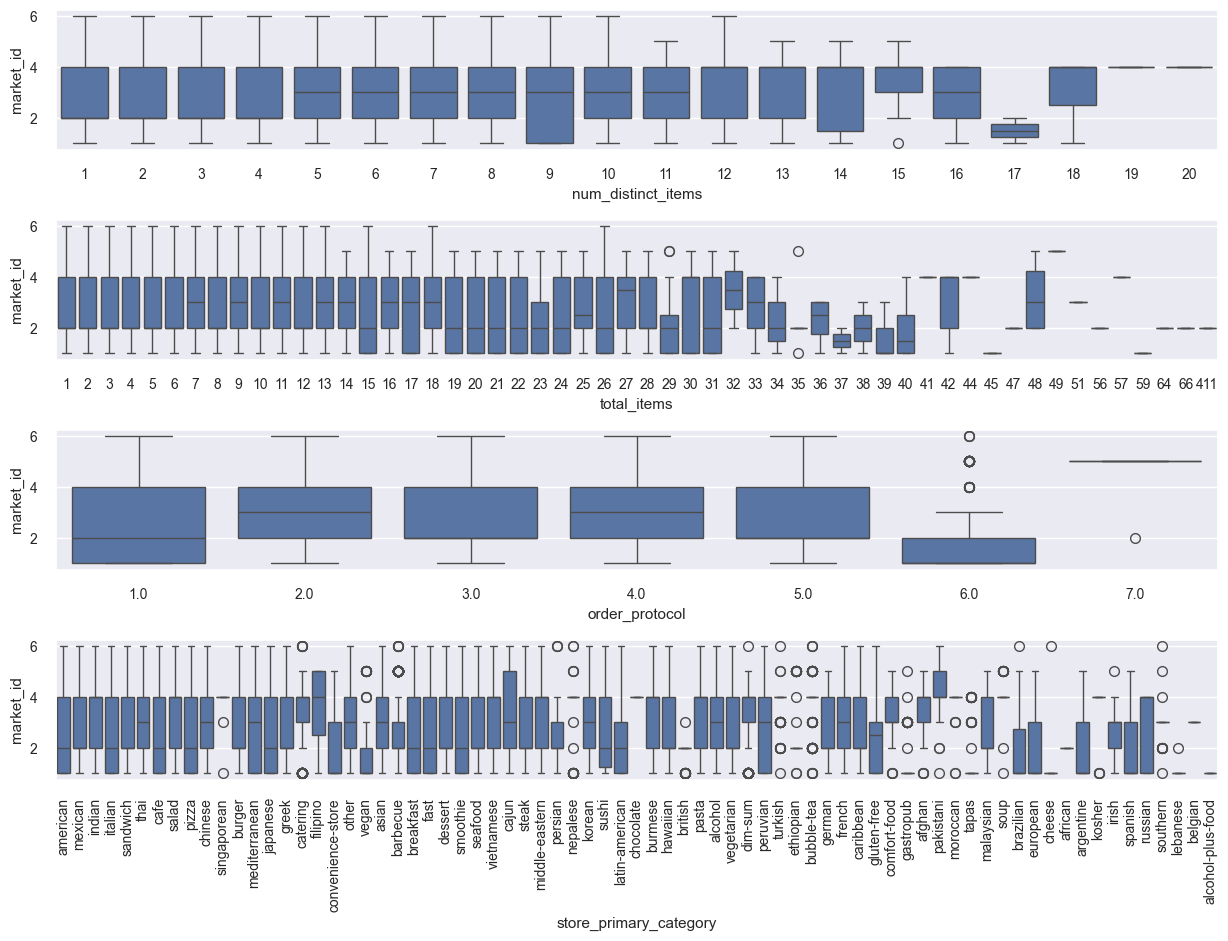

In [93]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(cat_cols[::-1], axs.ravel()):
    sns.boxplot(df, x=col, y='market_id', ax=ax)
    plt.xticks(rotation='vertical')
plt.show()

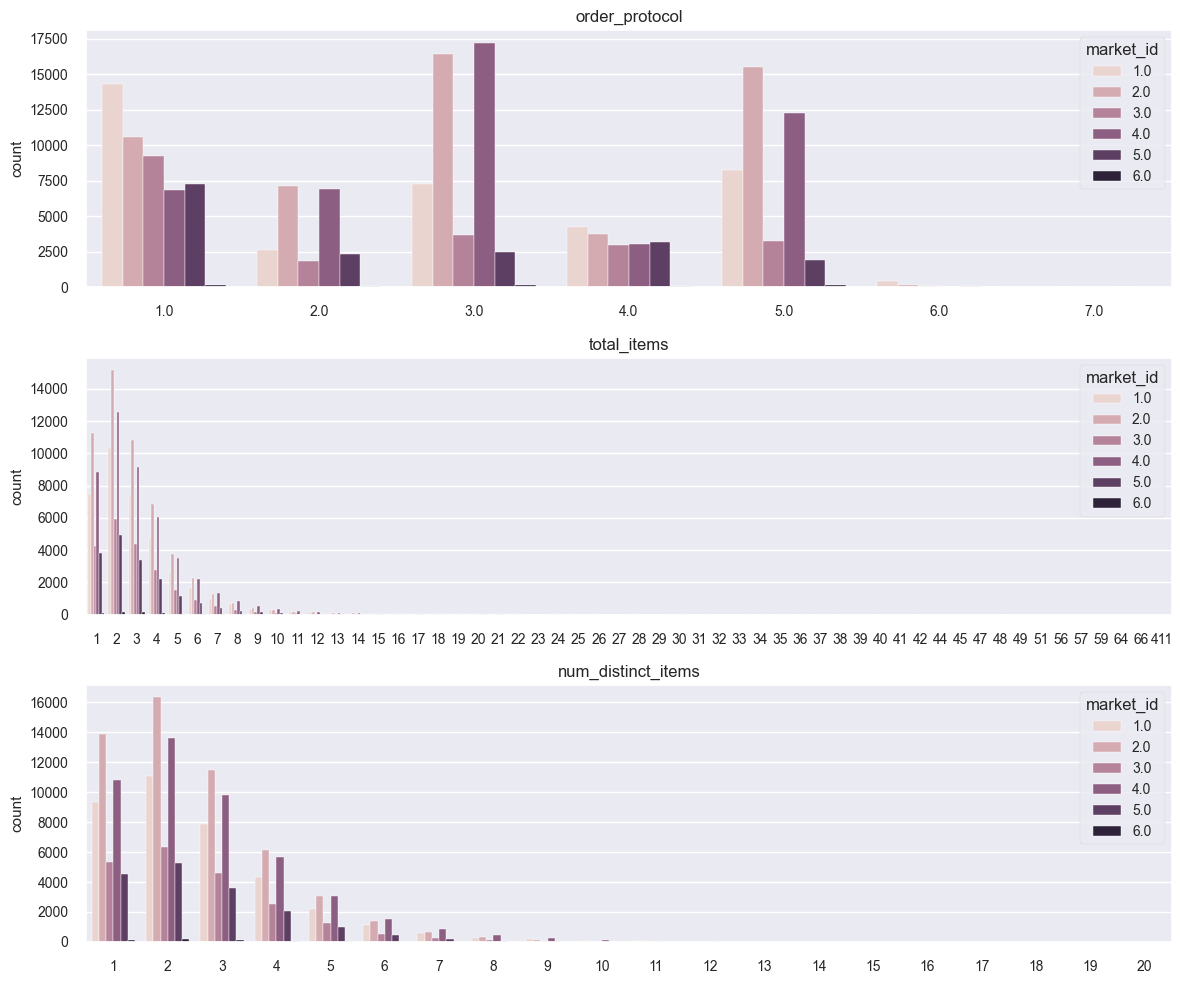

In [94]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, hue=df.market_id)
    ax.set_title(column)
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

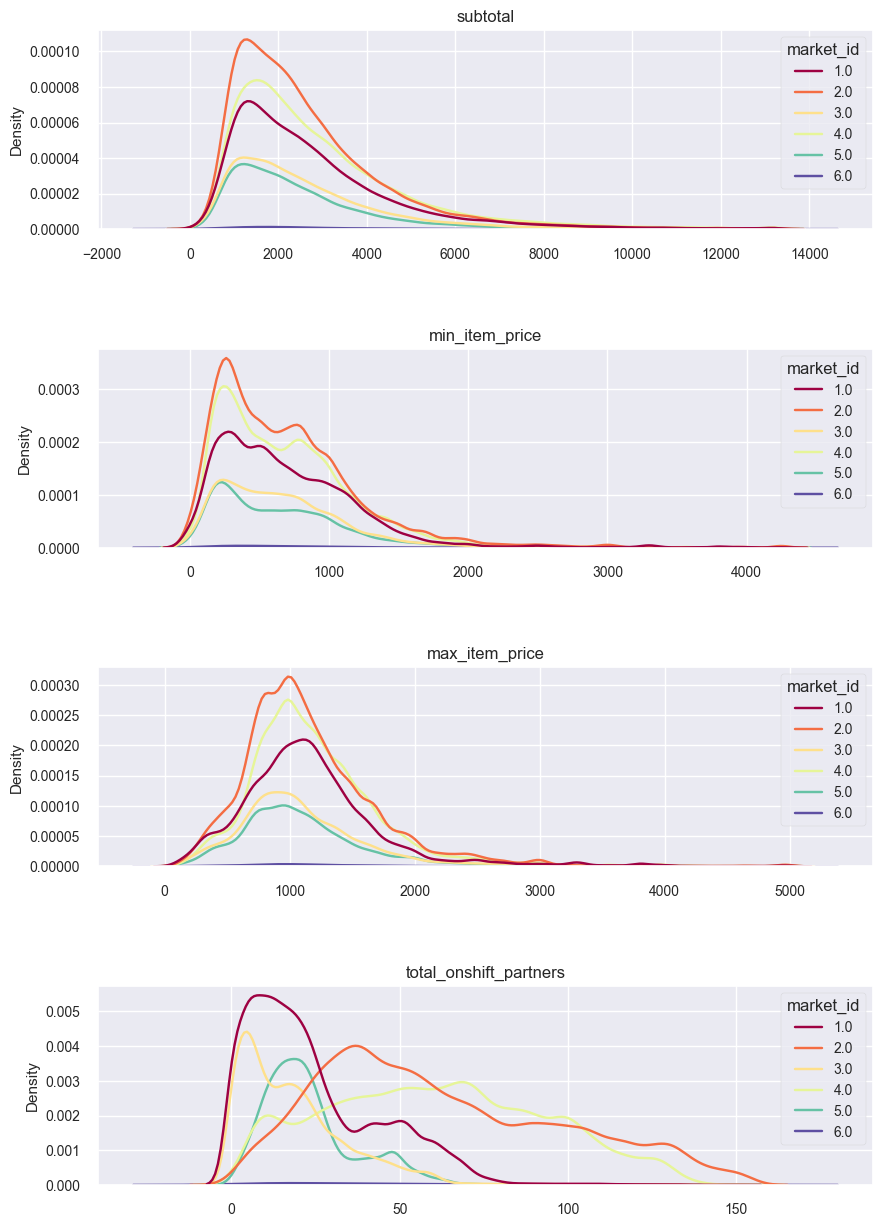

In [95]:
fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,15))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.kdeplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, ax=ax, hue=df.market_id, 
                palette = sns.color_palette("Spectral", as_cmap=True))
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

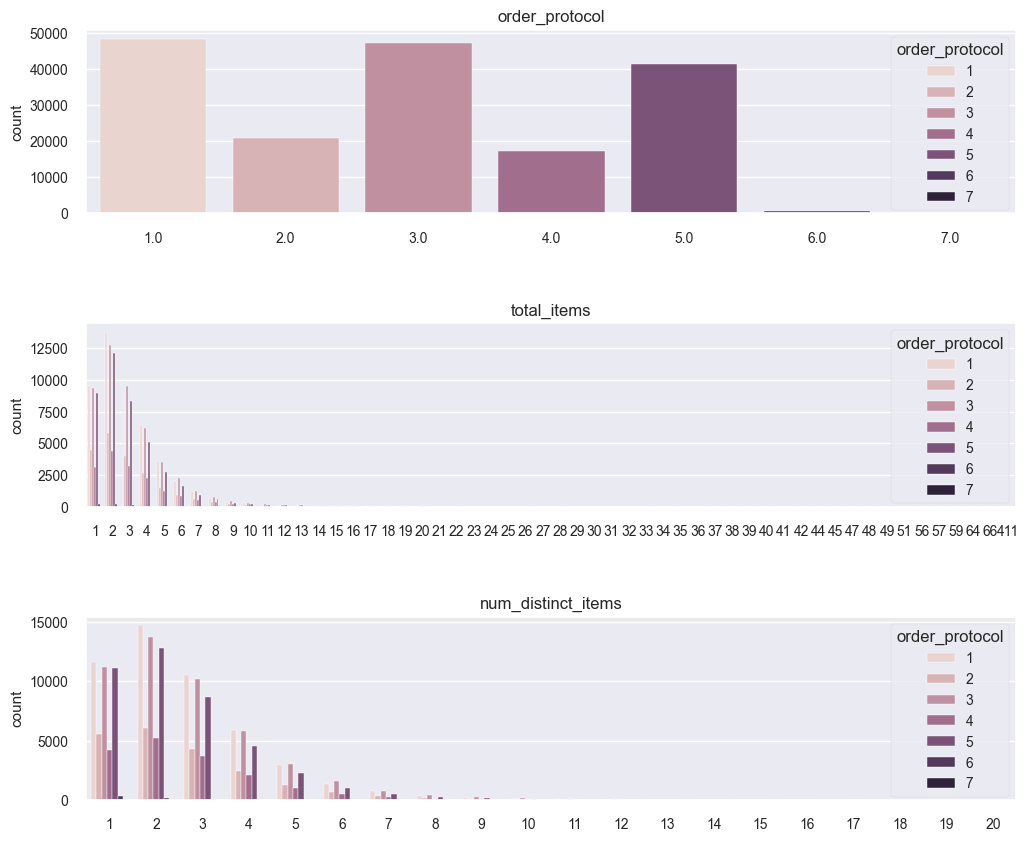

In [96]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, hue=df.order_protocol)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

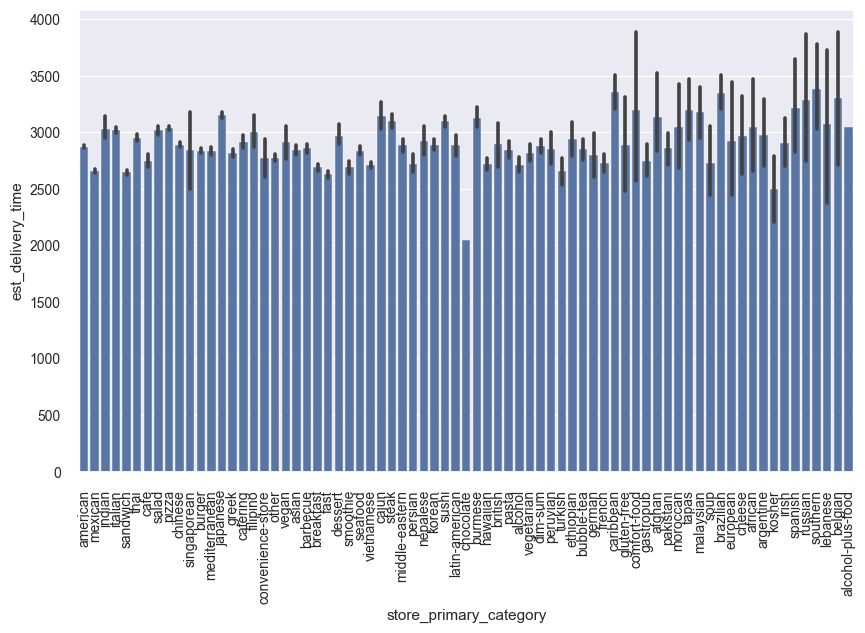

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.store_primary_category, y=est_delivery_time)
plt.ylabel('est_delivery_time')
plt.xticks(rotation='vertical')
plt.show()

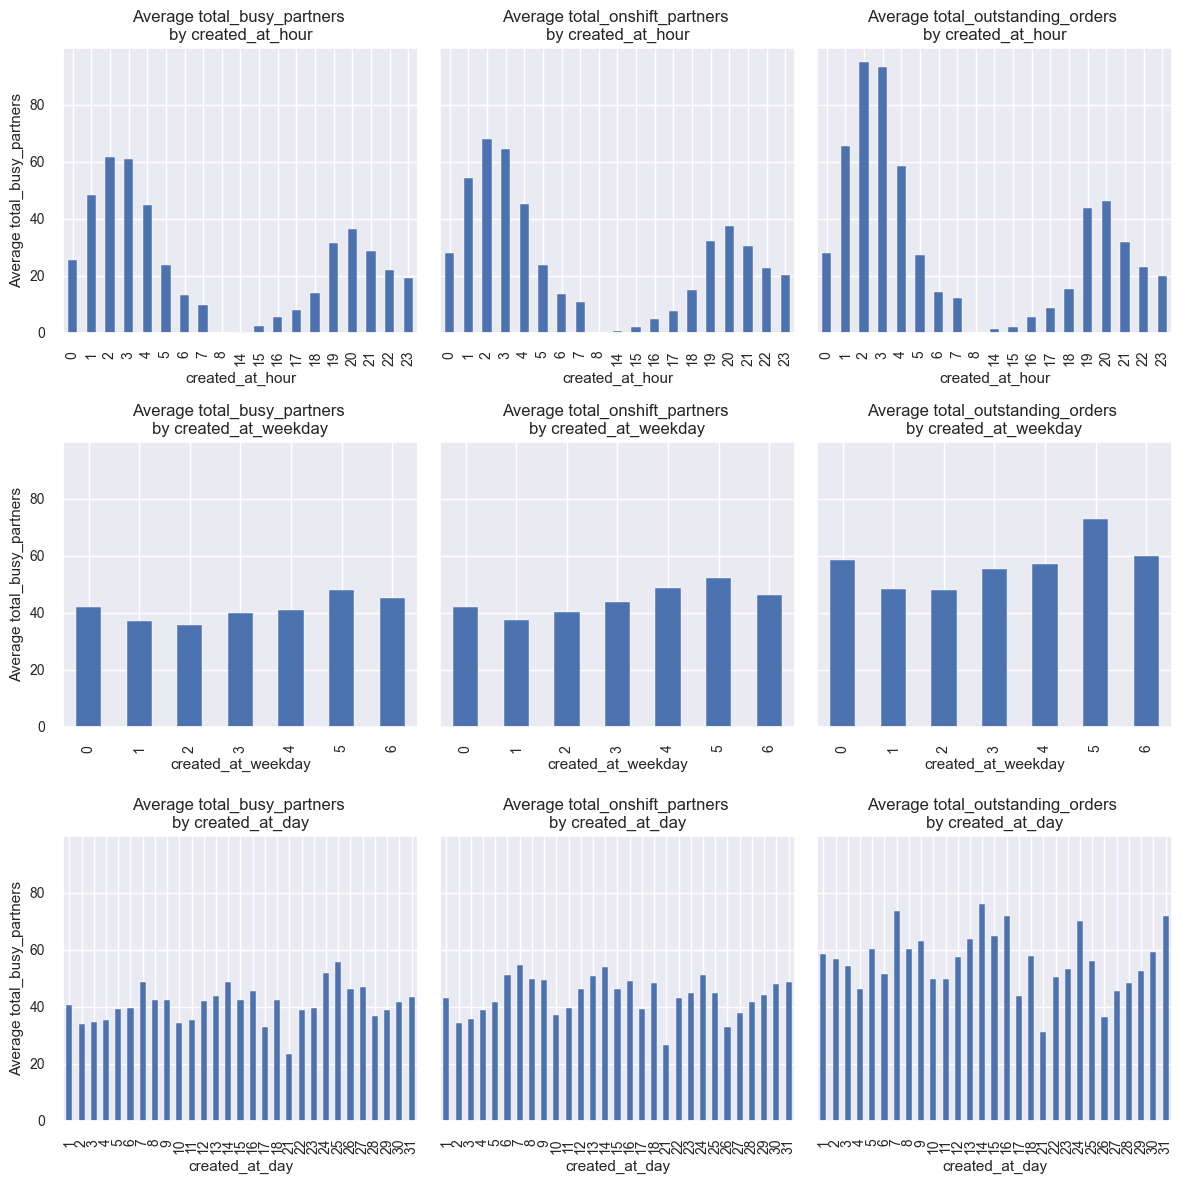

In [98]:
fig, axs = plt.subplots(3,3, figsize=(12,12), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['total_busy_partners', 'total_onshift_partners', 'total_outstanding_orders']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

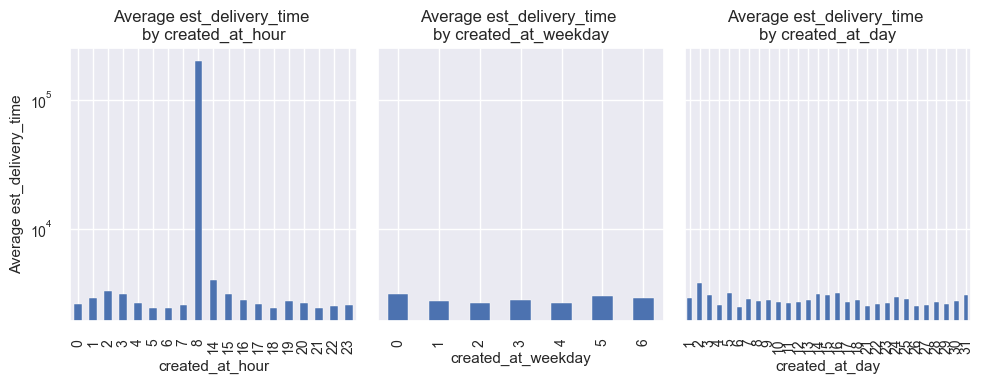

In [99]:
fig, axs = plt.subplots(1,3, figsize=(10,4), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['est_delivery_time']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

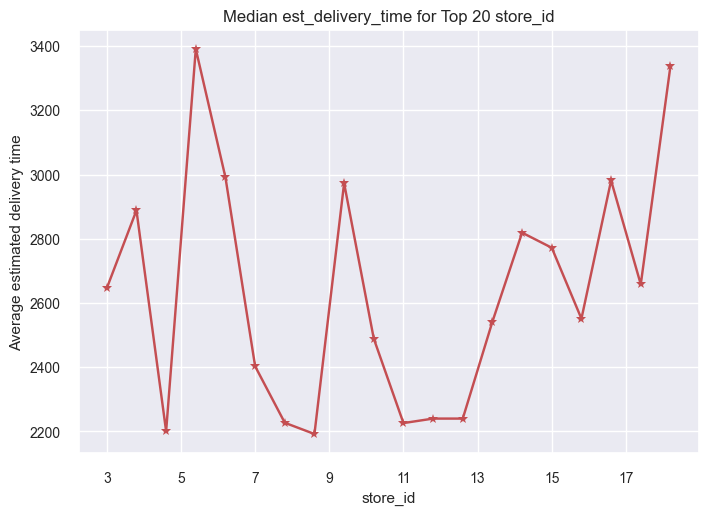

In [106]:
ax = df.groupby('store_id')['est_delivery_time'].median()[df.store_id.value_counts().head(20)].plot(marker='*',c='r')
ax.set_xticklabels(list(range(1, 21, 2)))
ax.set_title('Median est_delivery_time for Top 20 store_id')
ax.set_ylabel('Average estimated delivery time')
plt.show()

# 4. Multivariate Analysis <a class='anchor' id='multivariate'></a> [↑](#top)

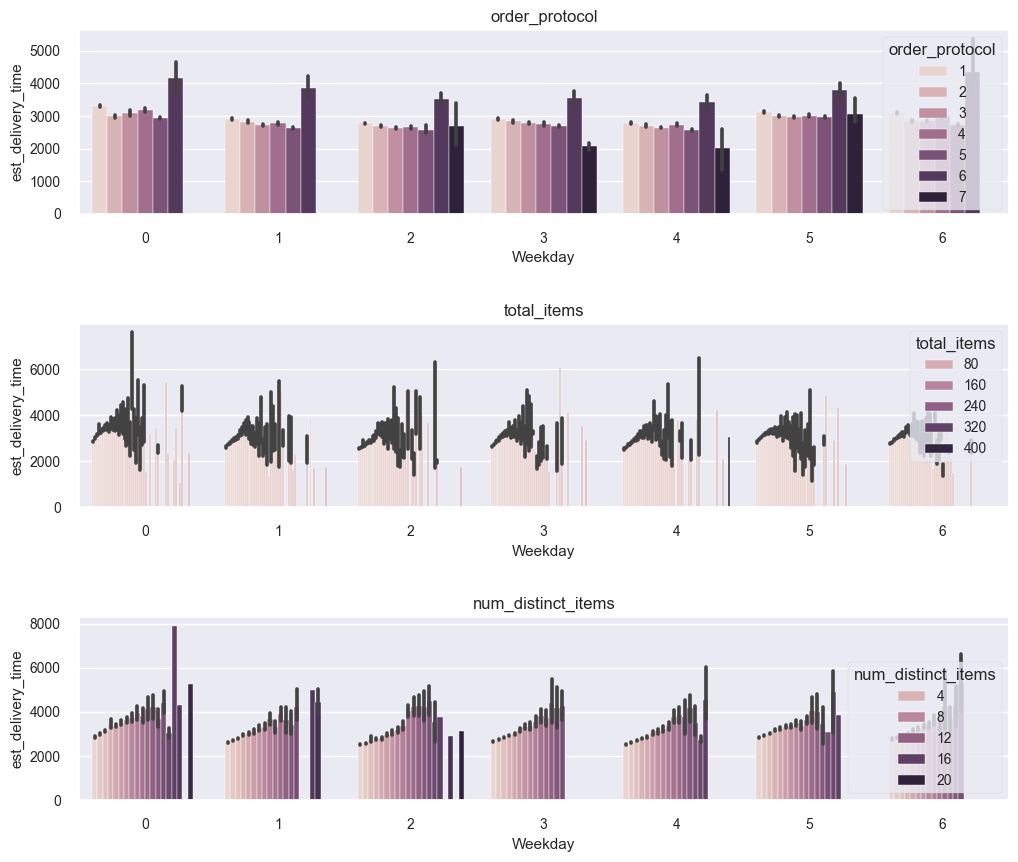

In [101]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.barplot(x=df.created_at.dt.weekday, y=est_delivery_time, ax=ax, hue=df[column])
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_xlabel('Weekday')
    ax.set_ylabel('est_delivery_time')
plt.show()

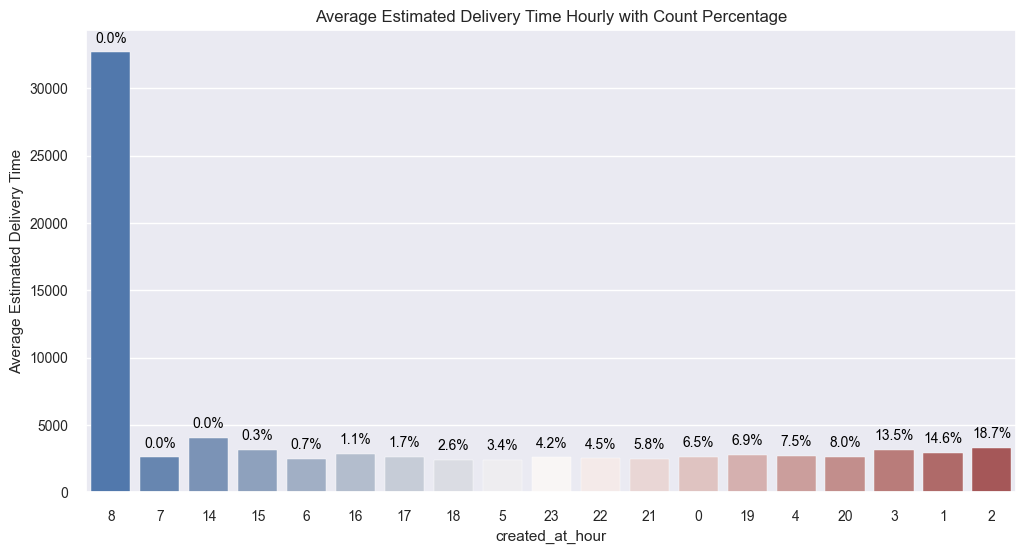

In [102]:
temp = pd.DataFrame({'created_at_hour':df.created_at.dt.hour, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_hour')['est_delivery_time'].mean()

plt.figure(figsize=(12,6))
# Count of deliveries for each hour
delivery_count = temp['created_at_hour'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)
delivery_count = delivery_count.sort_values()
ax = sns.barplot(x=temp1.index, y=temp1.values, palette='vlag', order=temp1[delivery_count.sort_values().index].index)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time Hourly with Count Percentage')
plt.show()

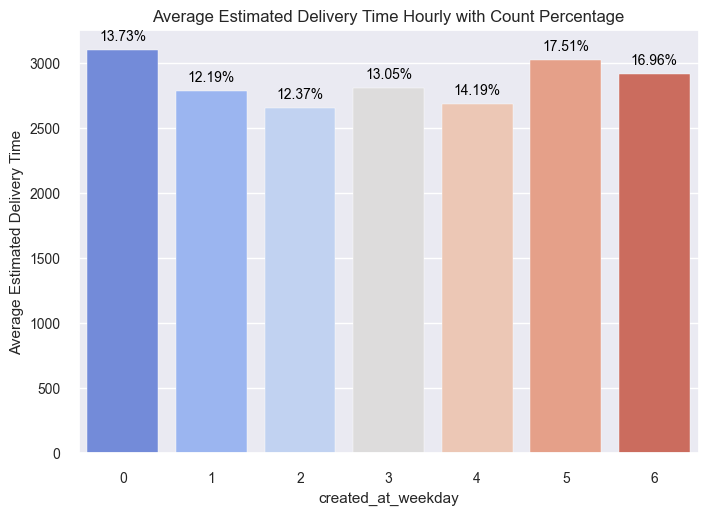

In [103]:
temp = pd.DataFrame({'created_at_weekday':df.created_at.dt.weekday, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_weekday')['est_delivery_time'].mean()

plt.figure(figsize=(8,5.5))
ax = sns.barplot(x=temp1.index, y=temp1.values, palette=sns.color_palette("coolwarm", n_colors=len(temp1)))

# Count of deliveries for each hour
delivery_count = temp['created_at_weekday'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time Hourly with Count Percentage')
plt.show()

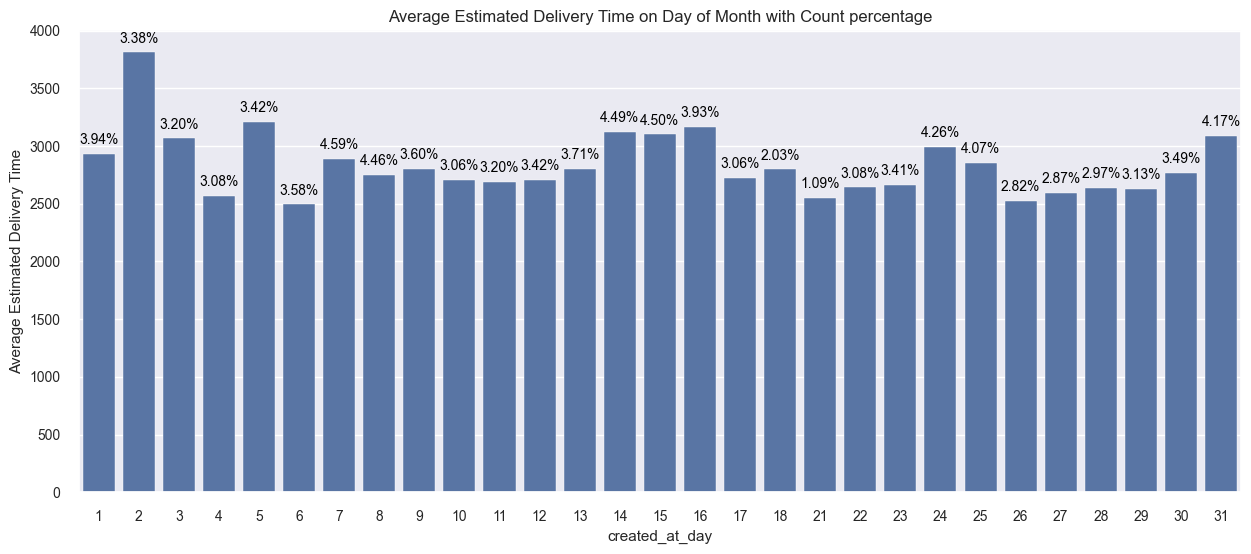

In [104]:
temp = pd.DataFrame({'created_at_day':df.created_at.dt.day, 'est_delivery_time':est_delivery_time})
temp = temp[temp.est_delivery_time < 60000].dropna()
temp1 = temp.groupby('created_at_day')['est_delivery_time'].mean()

plt.figure(figsize=(15,6))
ax = sns.barplot(x=temp1.index, y=temp1.values)

# Count of deliveries for each hour
delivery_count = temp['created_at_day'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)
# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time on Day of Month with Count percentage')
plt.show()

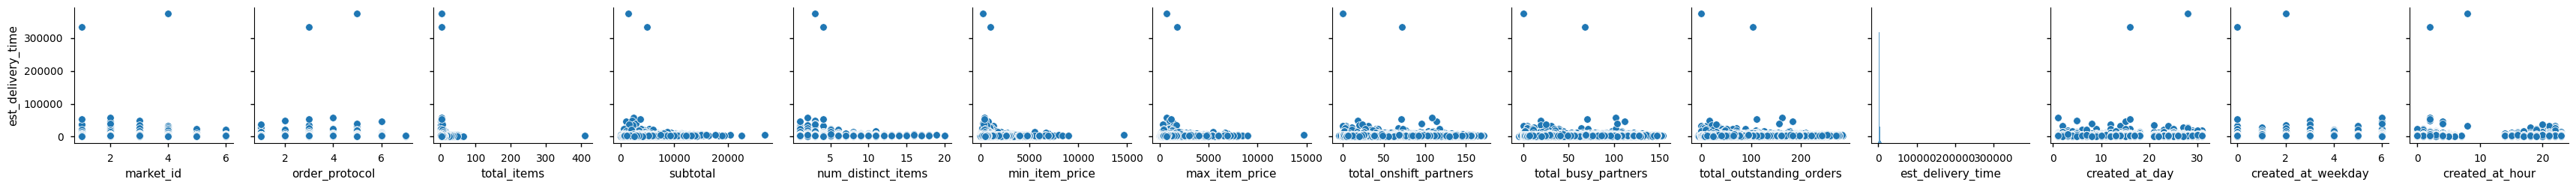

In [37]:
# sns.pairplot(df, y_vars='est_delivery_time' )

Text(0.5, 1.0, 'Percentage Distribution of Average Delivery Time by Hour and Weekday')

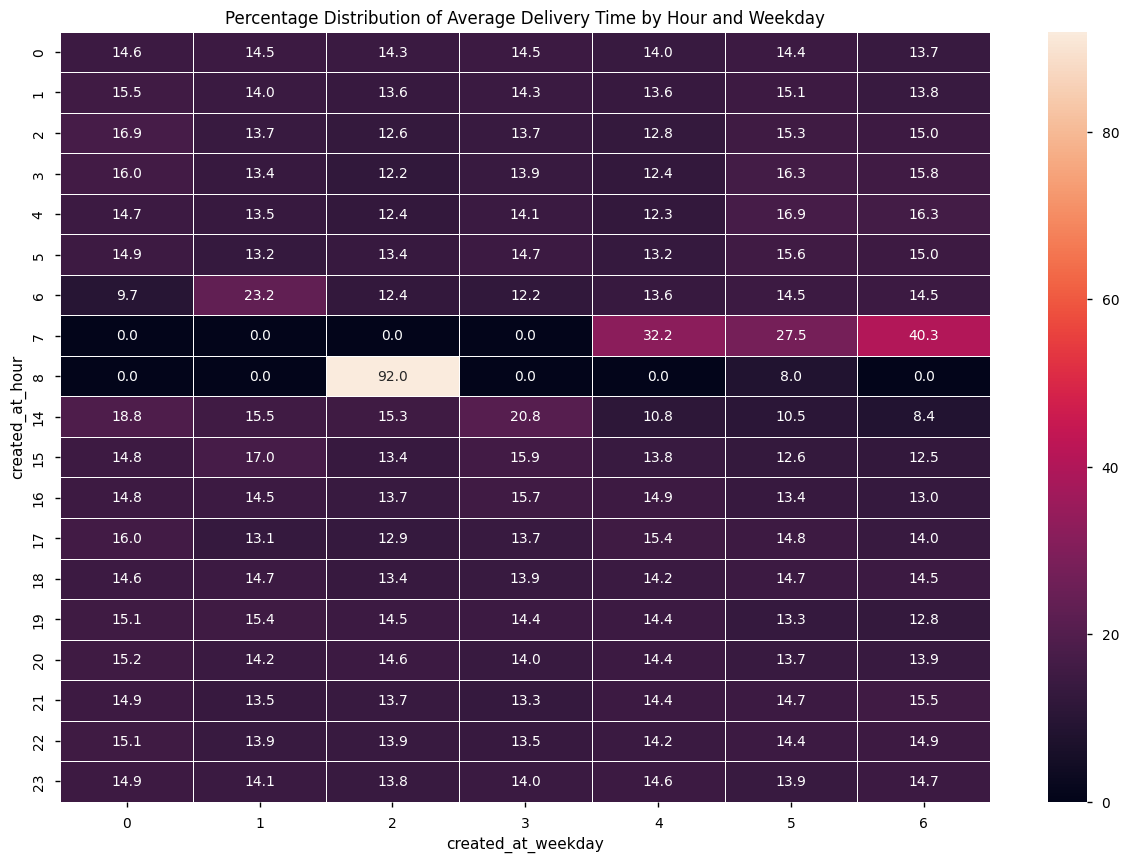

In [38]:
temp = df.groupby(['created_at_hour', 'created_at_weekday'])['est_delivery_time'].mean().unstack().fillna(0)

temp = temp.div(temp.sum(axis=1), axis=0) * 100

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(temp, annot=True, fmt=".1f", linewidths=.5, ax=ax)
ax.set_title('Percentage Distribution of Average Delivery Time by Hour and Weekday')

Text(0.5, 1.0, 'Percentage Distribution of Average Delivery Time by Hour and Weekday')

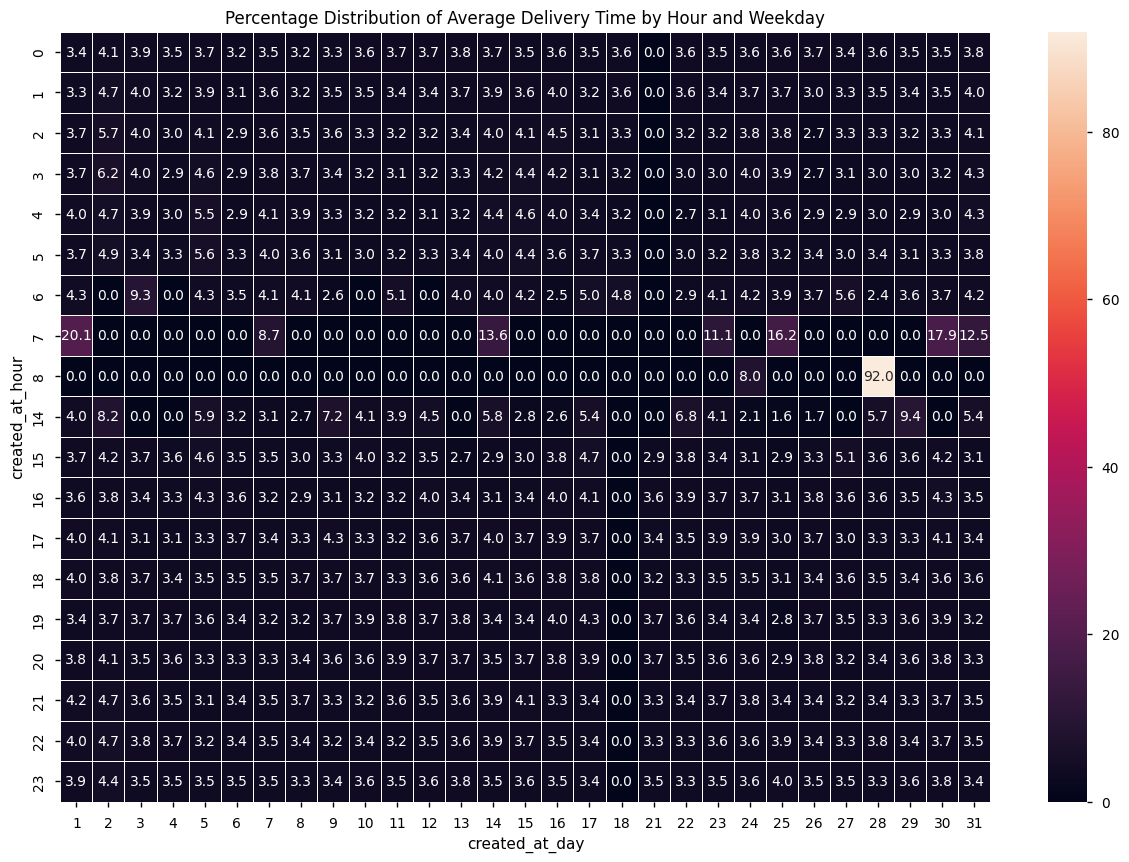

In [39]:
temp = df.groupby(['created_at_hour', 'created_at_day'])['est_delivery_time'].mean().unstack().fillna(0)

temp = temp.div(temp.sum(axis=1), axis=0) * 100

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(temp, annot=True, fmt=".1f", linewidths=.5, ax=ax)
ax.set_title('Percentage Distribution of Average Delivery Time by Hour and Weekday')

* Average est_delivery_time is high for around hours 6, 7 and 14 almost for all days.

<Axes: >

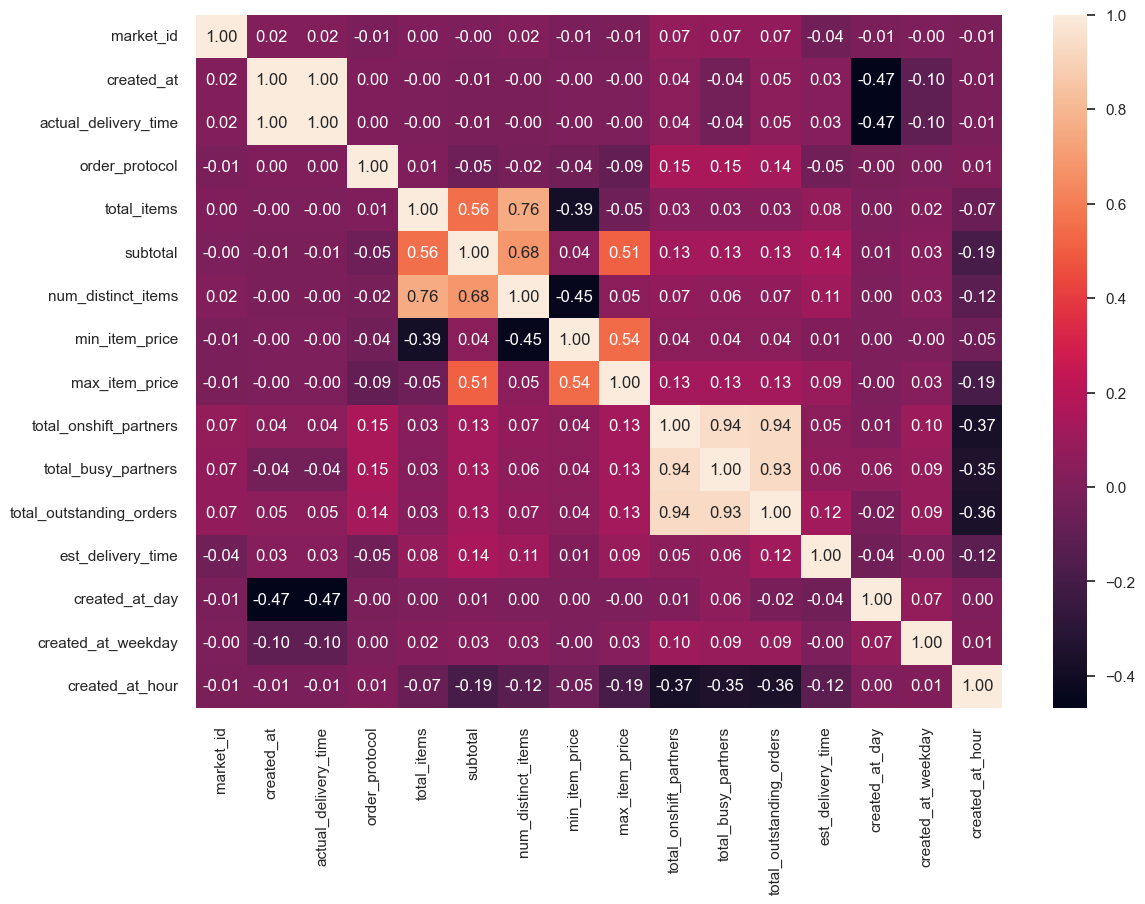

In [40]:
sns.set(rc={'figure.figsize':(13,9)})
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f")

---

# 3. Data Preprocessing and Feature Engineering <a class='anchor' id='feature_eng' ></a> [↑](#top)

In [107]:
df['created_at_period'] = pd.cut(df['created_at'].dt.hour, 
                                 bins=[0, 6, 12, 18, 24], 
                                 labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
                                 include_lowest=True)

In [108]:
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

In [109]:
df.isnull().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
est_delivery_time           0
created_at_day              0
created_at_weekday          0
created_at_hour             0
created_at_period           0
dtype: int64

In [110]:
df.duplicated().sum()

0

<Axes: xlabel='created_at_period'>

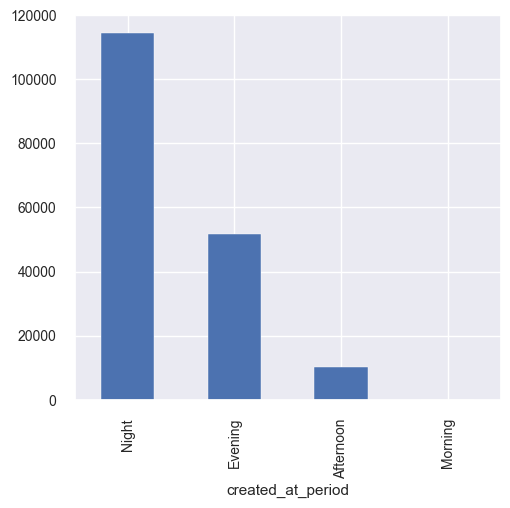

In [115]:
plt.figure(figsize=(5.5,5))
df.created_at_period.value_counts().plot(kind='bar')

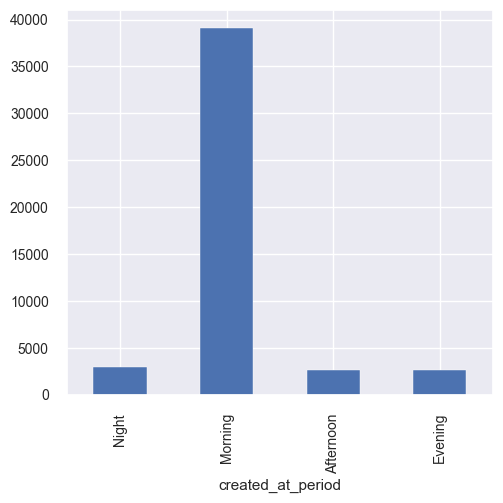

In [112]:
plt.figure(figsize=(5.5,5))
ax = df.groupby('created_at_period')['est_delivery_time'].mean().plot(kind='bar')


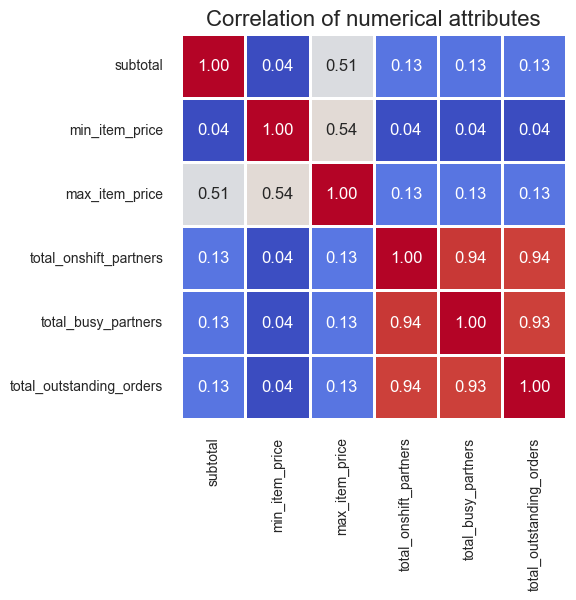

In [113]:
plt.figure(figsize=(5,5))
correlation = df[num_cols].corr()
sns.heatmap(correlation, linewidth=1, cmap='coolwarm', annot=True, fmt='.2f', cbar=False, square=True)
plt.title("Correlation of numerical attributes", size=16)
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 176248 non-null  float64 
 1   store_id                  176248 non-null  object  
 2   store_primary_category    176248 non-null  object  
 3   order_protocol            176248 non-null  float64 
 4   total_items               176248 non-null  int64   
 5   subtotal                  176248 non-null  int64   
 6   num_distinct_items        176248 non-null  int64   
 7   min_item_price            176248 non-null  int64   
 8   max_item_price            176248 non-null  int64   
 9   total_onshift_partners    176248 non-null  float64 
 10  total_busy_partners       176248 non-null  float64 
 11  total_outstanding_orders  176248 non-null  float64 
 12  est_delivery_time         176248 non-null  float64 
 13  created_at_day            176248 n

In [116]:
df_ = df.sample(frac=1)

In [117]:
from sklearn.model_selection import train_test_split

## Splitting data into train, 
X, X_test, y, y_test = train_test_split(df_.drop('est_delivery_time', axis=1), df_.est_delivery_time, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [118]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder

In [119]:
import gc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

encoder_list = [ OrdinalEncoder(), TargetEncoder(), MEstimateEncoder(), 
                JamesSteinEncoder(), LeaveOneOutEncoder() ,CatBoostEncoder()]

column_width = 20
print(f"|{'Encoder':<{column_width}}|{'MSE':<{column_width}}|")
print(f"|{'-' * column_width}|{'-' * column_width}|")
for encoder in encoder_list:
    
    train_enc = encoder.fit_transform(X_train.select_dtypes(include=['object', 'category']), y_train)
    val_enc = encoder.transform(X_val.select_dtypes(include=['object', 'category']))
    # test_enc = encoder.transform(X_test.select_dtypes(include='object'))

    train_enc = pd.concat([train_enc, X_train.select_dtypes(exclude=['object', 'category'])], axis=1)
    val_enc = pd.concat([val_enc, X_val.select_dtypes(exclude=['object', 'category'])], axis=1)
    # test_enc = pd.concat([test_enc, X_test.select_dtypes(exclude='object')], axis=1)
    
    lr = LinearRegression()
    lr.fit(train_enc, y_train)

    lr_pred = lr.predict(val_enc)
    # lr_pred_test = lr.predict(test_enc)

    score = mean_squared_error(y_val, lr_pred)
    # print(f"Test {str(encoder).split('(')[0]:>20} : ", end=" ")
    # print("MSE: ", score)
    encoder_name = str(encoder).split('(')[0]
    
    print(f"|{encoder_name:<{column_width}}|{score:<{column_width}}|")
    # print("RMSE: ", r2_score(y_val, lr_pred))
    del train_enc
    del val_enc
    gc.collect()

|Encoder             |MSE                 |
|--------------------|--------------------|
|OrdinalEncoder      |1224228.1022395398  |
|TargetEncoder       |1154755.0312462766  |
|MEstimateEncoder    |1166890.957957324   |
|JamesSteinEncoder   |1187404.9481338747  |
|LeaveOneOutEncoder  |1154271.8424398364  |
|CatBoostEncoder     |1154386.628950627   |


In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer

In [160]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        pass

    def fit(self, X, y=None):
        self.label_encoders = {}
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.label_encoders[col] = le
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col, le in self.label_encoders.items():
            X_transformed[col] = le.transform(X[col])
        return pd.DataFrame(X_transformed, columns=X.columns)
    
    def get_feature_names_out(self, input_features=None):
        return input_features
    
    def inverse_transform(self, X):
        X_inverse = X.copy()
        for col, le in self.label_encoders.items():
            X_inverse[col] = le.inverse_transform(X[col])
        return pd.DataFrame(X_inverse)
    

# Sample DataFrame
df0 = pd.DataFrame({'store_id': ['A', 'B', 'C', 'D', 'A', 'B', 'A'],
                   'store_col': ['A', 'B', 'A', 'C', 'A', 'B', 'A'],
                   'other_column': [10, 20, 30, 40, 50, 60, 70]})

# Create ColumnTransformer with MultiColumnLabelEncoder
col_transformer = ColumnTransformer(
                    transformers=[
                        ('a', MultiColumnLabelEncoder(), df.select_dtypes(exclude=[int, float]).columns)
                        ], 
                            remainder='passthrough')

# Apply the transformation
result = col_transformer.fit_transform(temp)

print(result)


[[4922.    4.    1. ...    6.    4.   22.]
 [5276.   46.    1. ...   10.    1.   21.]
 [5276.   36.    3. ...   16.    0.    0.]
 ...
 [3765.   28.    3. ...   24.    5.    4.]
 [4441.   58.    0. ...    1.    6.   18.]
 [4441.   58.    1. ...    8.    6.   19.]]


In [161]:
col_transformer.get_feature_names_out()

array(['a__store_id', 'a__store_primary_category', 'a__created_at_period',
       'remainder__market_id', 'remainder__order_protocol',
       'remainder__total_items', 'remainder__subtotal',
       'remainder__num_distinct_items', 'remainder__min_item_price',
       'remainder__max_item_price', 'remainder__total_onshift_partners',
       'remainder__total_busy_partners',
       'remainder__total_outstanding_orders',
       'remainder__est_delivery_time', 'remainder__created_at_day',
       'remainder__created_at_weekday', 'remainder__created_at_hour'],
      dtype=object)

In [147]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
test1 = clf.fit_predict(result[:-1])

In [148]:
iclf = IsolationForest()
test2 = iclf.fit_predict(result[:-1])

In [150]:
np.unique(test1, return_counts=True)

(array([-1,  1]), array([ 16850, 151642], dtype=int64))

In [153]:
odf = pd.DataFrame(result, columns=df.columns)

In [155]:
odf

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,est_delivery_time,created_at_day,created_at_weekday,created_at_hour,created_at_period
0,4922.0,4.0,1.0,1.0,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,3779.0,6.0,4.0,22.0
1,5276.0,46.0,1.0,2.0,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,4024.0,10.0,1.0,21.0
2,5276.0,36.0,3.0,2.0,3.0,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,1586.0,16.0,0.0,0.0
3,5240.0,38.0,3.0,1.0,1.0,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,2273.0,12.0,3.0,3.0
4,5240.0,38.0,3.0,1.0,1.0,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,2988.0,27.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168488,3765.0,28.0,3.0,1.0,4.0,3.0,1389.0,3.0,345.0,649.0,17.0,17.0,23.0,3907.0,17.0,1.0,0.0
168489,3765.0,28.0,3.0,1.0,4.0,6.0,3010.0,4.0,405.0,825.0,12.0,11.0,14.0,3383.0,13.0,4.0,0.0
168490,3765.0,28.0,3.0,1.0,4.0,5.0,1836.0,3.0,300.0,399.0,39.0,41.0,40.0,3008.0,24.0,5.0,4.0
168491,4441.0,58.0,0.0,1.0,1.0,1.0,1175.0,1.0,535.0,535.0,7.0,7.0,12.0,3907.0,1.0,6.0,18.0


<Axes: xlabel='est_delivery_time', ylabel='Density'>

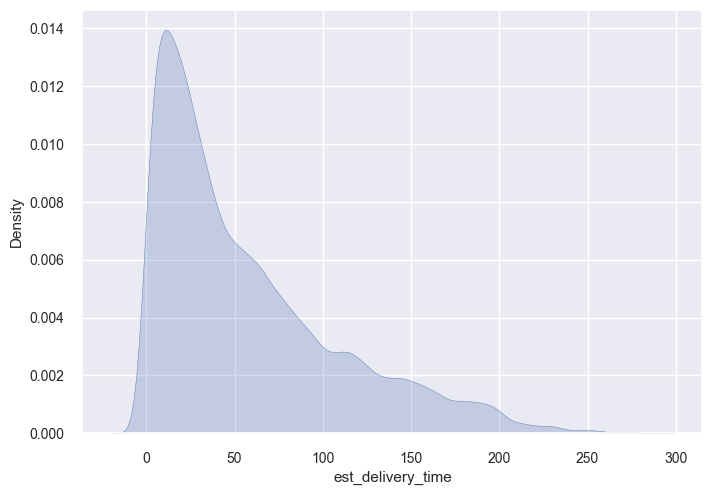

In [129]:
sns.kdeplot(odf, x='est_delivery_time', fill=True)

In [130]:
np.unique(test1, return_counts=True)

(array([-1,  1]), array([ 16850, 151643], dtype=int64))

In [137]:
odf[test1 >0].est_delivery_time.max()

278.0

In [1]:
col = ColumnTransformer(transformers=[('a', OneHotEncoder(), ['store_id', 'store_primary_category'])])
result = col.fit_transform(df[['store_id', 'store_primary_category']])

print(result)

NameError: name 'ColumnTransformer' is not defined

In [172]:
NUM_FEATURES = X_train.select_dtypes(exclude=['object', 'category']).columns
OBJ_FEATURES = X_train.select_dtypes(include=['object']).columns
CAT_FEATURES = X_train.select_dtypes(include=['category']).columns

def label_encode_column(column):
    label_encoder = LabelEncoder()
    return label_encoder.fit_transform(column)

num_pipe = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),   
])

obj_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', FunctionTransformer(label_encode_column, validate=False)),
    ('scale', StandardScaler(with_mean=False)),
])

cat_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder()),
    ('scale', StandardScaler(with_mean=False)),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, NUM_FEATURES),
    ('obj', obj_pipe, OBJ_FEATURES),
    ('cat', cat_pipe, CAT_FEATURES)
], remainder='drop')

In [163]:
NUM_FEATURES = X_train.select_dtypes(exclude=['object', 'category']).columns
OBJ_FEATURES = X_train.select_dtypes(include=['object']).columns
CAT_FEATURES = X_train.select_dtypes(include=['category']).columns

num_pipe = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),   
])
obj_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')) ,  
    ('encode', LabelEncoder()),   
    ('scale', StandardScaler(with_mean=False)),
])

cat_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')) ,  
    ('encode', OrdinalEncoder()),   
    ('scale', StandardScaler(with_mean=False)),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, NUM_FEATURES),
    ('obj', obj_pipe, OBJ_FEATURES),
    ('cat', cat_pipe, CAT_FEATURES)
], remainder='drop')


In [174]:
temp = preprocessor.fit_transform(X_train)

ValueError: y should be a 1d array, got an array of shape (112798, 2) instead.

134251    3247.0
23079     4266.0
34766     5206.0
180682    3636.0
102698    2741.0
           ...  
182799    2905.0
59517     2043.0
50083     3066.0
25754     4091.0
659       3364.0
Name: est_delivery_time, Length: 112798, dtype: float64

In [155]:
df.shape

(176248, 17)

In [157]:
temp.shape

(112798, 16)

In [83]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model = LocalOutlierFactor()

model.fit_predict(temp, )

In [88]:
np.unique(temp, return_counts=True)

(array([-1,  1]), array([  2915, 173333], dtype=int64))

In [93]:
temp = np.where(temp==-1, 0, 1)

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 176248 non-null  float64 
 1   store_id                  176248 non-null  object  
 2   store_primary_category    176248 non-null  object  
 3   order_protocol            176248 non-null  float64 
 4   total_items               176248 non-null  int64   
 5   subtotal                  176248 non-null  int64   
 6   num_distinct_items        176248 non-null  int64   
 7   min_item_price            176248 non-null  int64   
 8   max_item_price            176248 non-null  int64   
 9   total_onshift_partners    176248 non-null  float64 
 10  total_busy_partners       176248 non-null  float64 
 11  total_outstanding_orders  176248 non-null  float64 
 12  est_delivery_time         176248 non-null  float64 
 13  created_at_day            176248 n

In [ ]:
df['lof_anomaly_score'] = model.fit_predict(df)
print("number of outliers : ",(len(df[df['lof_anomaly_score'] == -1]), (df['lof_anomaly_score'] == -1).sum()))
df = df[df['lof_anomaly_score'] == 1]

sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

# drop anomaly column
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

In [94]:
df[temp]

KeyError: "None of [Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n       ...\n       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],\n      dtype='int32', length=176248)] are in the [columns]"

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 176248 non-null  float64 
 1   store_id                  176248 non-null  int32   
 2   store_primary_category    176248 non-null  object  
 3   order_protocol            176248 non-null  float64 
 4   total_items               176248 non-null  int64   
 5   subtotal                  176248 non-null  int64   
 6   num_distinct_items        176248 non-null  int64   
 7   min_item_price            176248 non-null  int64   
 8   max_item_price            176248 non-null  int64   
 9   total_onshift_partners    176248 non-null  float64 
 10  total_busy_partners       176248 non-null  float64 
 11  total_outstanding_orders  176248 non-null  float64 
 12  est_delivery_time         176248 non-null  float64 
 13  created_at_day            176248 n

|Encoder             |MSE                 |
|--------------------|--------------------|
|OrdinalEncoder      |1182953.3857586985  |
|TargetEncoder       |1176764.332833768   |
|MEstimateEncoder    |1236201.347332982   |
|JamesSteinEncoder   |1201174.7683689361  |
|LeaveOneOutEncoder  |1130023.6267376295  |
|CatBoostEncoder     |1126751.5994873948  |


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf_pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),       
        ('regress', RandomForestRegressor())
    ])

In [68]:
rf_pipeline.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_da...
                                                                   CatBoostEncoder()),
                                                                  ('scale',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['store_id', 'store_primary_category'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder()),
                                                                  ('scale',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['created_at_period'], dtype='object'))])),
                ('regress', RandomForestRegressor())])

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Prediction
prediction = rf_pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, prediction)
print('mae:' ,mae)

r2_score = r2_score(y_test, prediction)
print('r_squared:' ,r2_score)

mse :  936155.874001722
rmse :  967.5514839023926
mae: 662.9588519148937
r_squared: 0.2983642843724913


Text(0.5, 0, 'Random Forest Feature Importance')

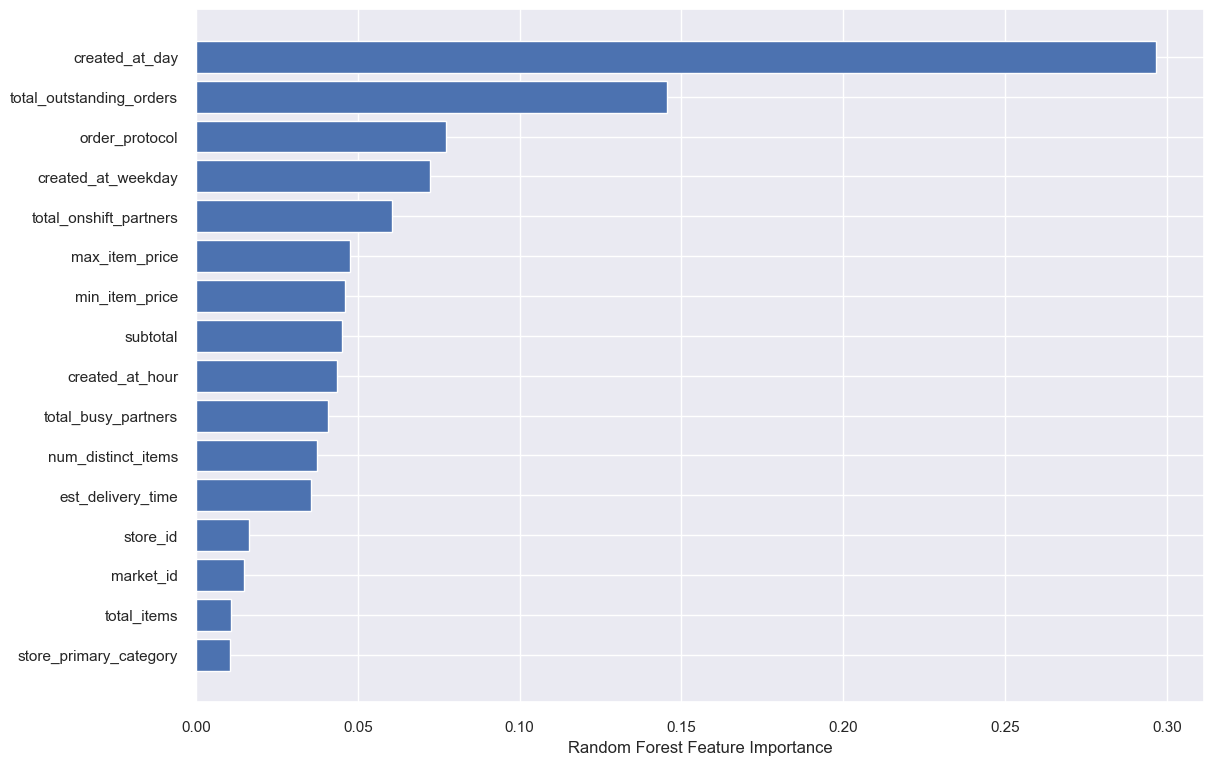

In [69]:
# Feature importance

sorted_idx = rf_pipeline.named_steps.regress.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf_pipeline.named_steps.regress.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [63]:
y_pred = lr_pipeline.predict(X_test)
print('MSE for Gradient Descent Linear Regression: ', mean_squared_error(y_test, y_pred).round(4))

MSE for Gradient Descent Linear Regression:  1045901.2547


In [95]:
porter.min_item_price.sort_values().head(20)

790      -86
187278   -52
170424   -51
46378    -48
46369    -35
77238    -31
104173   -30
91319    -13
119785    -9
119854    -7
165821    -6
1351      -1
171501     0
106100     0
15970      0
70137      0
171663     0
70134      0
70132      0
70131      0
Name: min_item_price, dtype: int64

In [ ]:
# Check for outliers
sns.scatterplot(x='est_delivery_time', y='subtotal', data=df.dropna(), hue='order_protocol')

In [96]:
(df.total_onshift_partners.sort_values() < 0).sum()

21

In [97]:
(df.total_busy_partners.sort_values() < 0).sum()


21

In [100]:
(df.total_outstanding_orders.sort_values() < 0).sum()

42

In [101]:
df.nunique(dropna=False)

market_id                        6
created_at                  163082
actual_delivery_time        160686
store_id                      5645
store_primary_category          73
order_protocol                   7
total_items                     54
subtotal                      8189
num_distinct_items              20
min_item_price                2251
max_item_price                2586
total_onshift_partners         172
total_busy_partners            158
total_outstanding_orders       281
est_delivery_time             6984
created_at_day                  29
created_at_weekday               7
created_at_hour                 19
created_at_period                4
dtype: int64

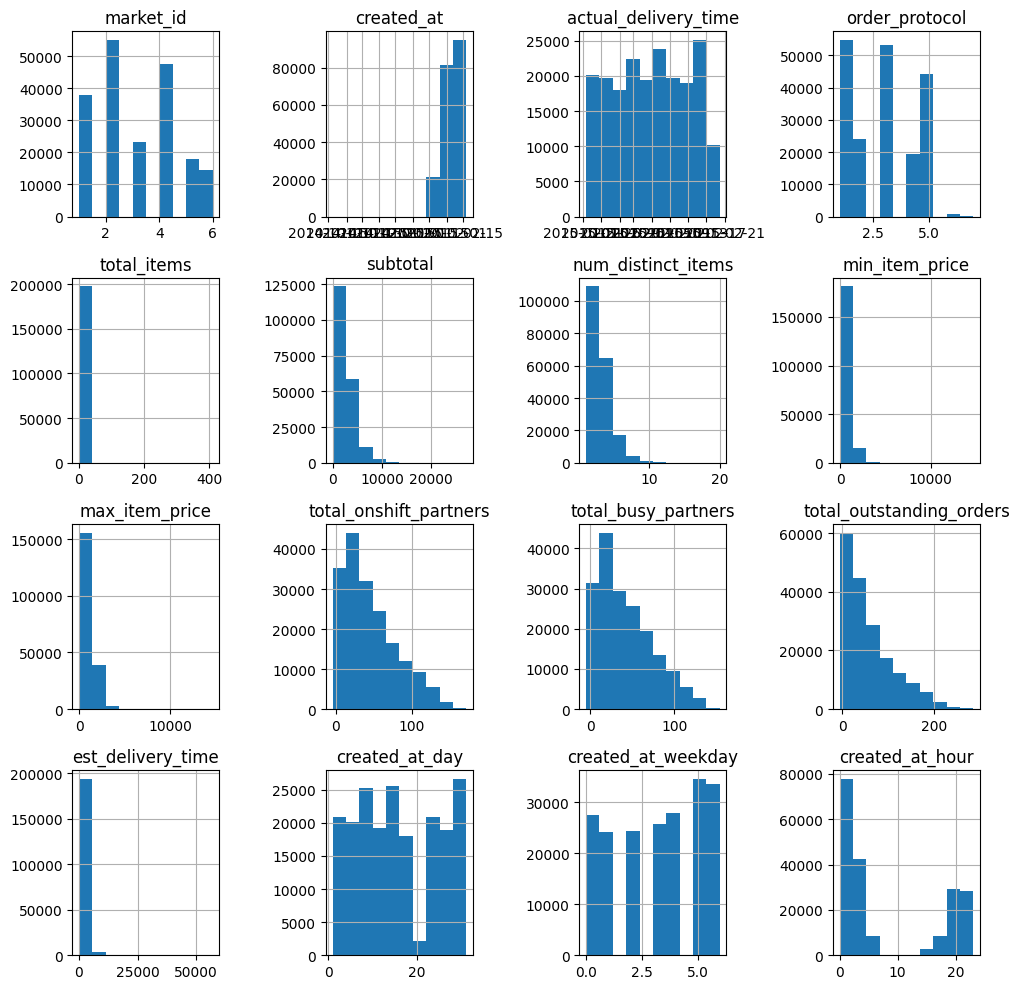

In [34]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

<Axes: >

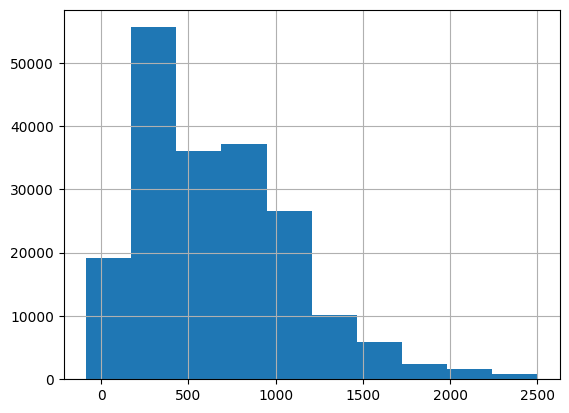

In [35]:
df[df.min_item_price < df.min_item_price.quantile(.99)].min_item_price.hist()

<Axes: >

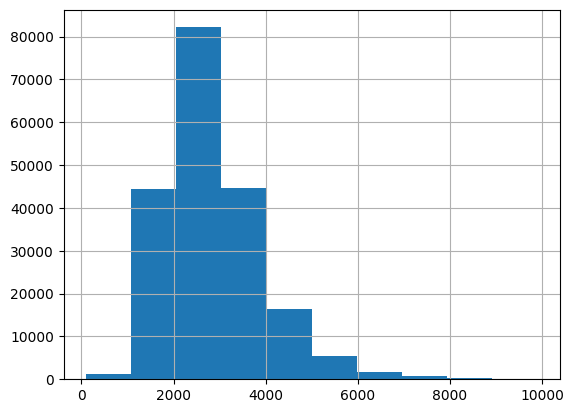

In [36]:
df[df.est_delivery_time < df.est_delivery_time.quantile(.999)].est_delivery_time.hist()

In [37]:
df.created_at = df.created_at.astype('int64') // 10**9

# The division by 10**9 is necessary because the timestamp is typically in nanoseconds, and dividing by 10**9 converts it to seconds.

In [38]:
df.actual_delivery_time = df.actual_delivery_time.astype('int64') // 10**9

In [39]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(df.select_dtypes(exclude=['object', 'category']).dropna())

In [40]:
(outlier_pred == -1).sum()

38813